# ADVANCED SCIKIT-LEARN

#### TASK: Searching for optimal parameters
- FUNCTION: GridSearchCV
- DOCUMENTATION: http://scikit-learn.org/stable/modules/grid_search.html
- DATA: Titanic (n=891, p=5 selected, type=classification)
- DATA DICTIONARY: https://www.kaggle.com/c/titanic-gettingStarted/data

In [1]:
%matplotlib inline

In [2]:
# read in and prepare titanic data
import pandas as pd

import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [3]:
titanic = pd.read_csv('../data/titanic.csv')
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [5]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [6]:
# use cross-validation to find best max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [7]:
# try max_depth=2
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc').mean()

0.8018358515123222

In [8]:
# try max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc').mean()

0.8427518744871685

In [11]:
max_depth_range = range(1, 21)
param_grid = dict(max_depth=list(max_depth_range))

In [12]:
param_grid

{'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [13]:
# use GridSearchCV to automate the search
from sklearn.model_selection import GridSearchCV
treeclf = DecisionTreeClassifier(random_state=1)
max_depth_range = range(1, 21)
param_grid = dict(max_depth=list(max_depth_range))
grid = GridSearchCV(treeclf, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [14]:
grid.cv_results_

{'mean_fit_time': array([0.0020834 , 0.00262952, 0.00218661, 0.0019398 , 0.00228875,
        0.00203612, 0.00203581, 0.00243268, 0.00218334, 0.00213053,
        0.00232558, 0.00243578, 0.00277145, 0.00228703, 0.00222766,
        0.00257468, 0.00222952, 0.00277448, 0.0026366 , 0.00252943]),
 'std_fit_time': array([0.00042889, 0.00098086, 0.00046855, 0.00060592, 0.00070586,
        0.00071615, 0.00026797, 0.00078313, 0.00039742, 0.00044399,
        0.00054758, 0.00064204, 0.0016211 , 0.00064087, 0.00033924,
        0.00072711, 0.00033469, 0.00082696, 0.00070047, 0.00071214]),
 'mean_score_time': array([0.00079448, 0.00133653, 0.00083709, 0.00079153, 0.00085783,
        0.0009886 , 0.00088301, 0.0007462 , 0.00090072, 0.00089228,
        0.00098956, 0.00078847, 0.00088983, 0.00089397, 0.00114436,
        0.00089283, 0.00104256, 0.00080464, 0.00078769, 0.0010421 ]),
 'std_score_time': array([0.00045728, 0.00050209, 0.00031311, 0.00033238, 0.00032873,
        0.00053548, 0.00042619, 0.000341

In [15]:
list(zip(grid.cv_results_['mean_test_score'], grid.cv_results_['std_test_score'], grid.cv_results_['params']))

[(0.7667916467678797, 0.036301647287681996, {'max_depth': 1}),
 (0.8018158617617256, 0.040994520685465094, {'max_depth': 2}),
 (0.8426360706284123, 0.03695937934118168, {'max_depth': 3}),
 (0.8438377382491729, 0.04863394523081387, {'max_depth': 4}),
 (0.8508455218067684, 0.035927320990559515, {'max_depth': 5}),
 (0.8453701742801895, 0.041472527982292645, {'max_depth': 6}),
 (0.827621385141026, 0.052912409821174095, {'max_depth': 7}),
 (0.8174197529911533, 0.05172877981766455, {'max_depth': 8}),
 (0.8121182286924677, 0.05560649275832261, {'max_depth': 9}),
 (0.8031600575701717, 0.059943022996117486, {'max_depth': 10}),
 (0.7990010499319272, 0.05896191181720553, {'max_depth': 11}),
 (0.7908102916256347, 0.05564893309965709, {'max_depth': 12}),
 (0.7859001553891629, 0.05926161215906985, {'max_depth': 13}),
 (0.7864352577067967, 0.05958892310411131, {'max_depth': 14}),
 (0.7848073948258805, 0.05801874897320981, {'max_depth': 15}),
 (0.7848073948258805, 0.05801874897320981, {'max_depth': 16

In [16]:
%matplotlib inline

In [17]:
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross-Validated AUC')

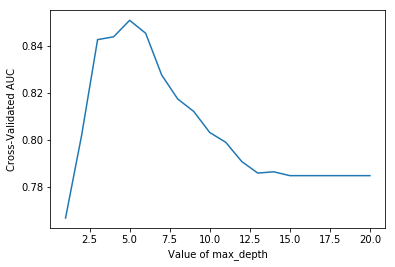

In [18]:
# plot the results
import matplotlib.pyplot as plt
plt.plot(max_depth_range, grid_mean_scores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated AUC')

### WHAT WAS THE BEST?

In [19]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8508455218067684
{'max_depth': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


In [20]:
# search multiple parameters simultaneously
max_depth_range = range(1, 21)
leaf_range = range(1, 11)
param_grid = dict(max_depth=list(max_depth_range), min_samples_leaf=list(leaf_range))
grid = GridSearchCV(treeclf, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [21]:
#print (grid.grid_scores_)
print (grid.cv_results_)
print (grid.best_score_)
print (grid.best_params_)

{'mean_fit_time': array([0.00218005, 0.00233588, 0.00163808, 0.00173616, 0.00198216,
       0.00168667, 0.00143881, 0.00208292, 0.00177994, 0.00174372,
       0.00183463, 0.0019371 , 0.00194945, 0.00202849, 0.00173218,
       0.00198469, 0.00178819, 0.00188155, 0.00242937, 0.00183516,
       0.0018868 , 0.00173628, 0.00208418, 0.00202913, 0.00183153,
       0.0018307 , 0.00203528, 0.00183575, 0.00223074, 0.00203686,
       0.00222652, 0.00208397, 0.00193739, 0.00198941, 0.00207794,
       0.00182898, 0.00208428, 0.00208731, 0.00197568, 0.00198417,
       0.00193925, 0.00188129, 0.00237932, 0.00218723, 0.00212703,
       0.00198379, 0.00188737, 0.0019907 , 0.00213172, 0.00193715,
       0.00243185, 0.00283086, 0.00189679, 0.00212977, 0.00202992,
       0.00278702, 0.00287917, 0.00243199, 0.00198662, 0.00212922,
       0.00247777, 0.00246961, 0.00228586, 0.0020303 , 0.00218778,
       0.00203357, 0.00209115, 0.00198424, 0.00213554, 0.00198228,
       0.00247738, 0.00257733, 0.00238402, 0

In [22]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8574417446240249
{'max_depth': 10, 'min_samples_leaf': 8}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


#### TASK: Standardization of features (aka "center and scale" or "z-score normalization")
- FUNCTION: StandardScaler
- DOCUMENTATION: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- DATA: Wine (n=178, p=2 selected, type=classification)
- DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Wine

In [23]:
# fake data
train = pd.DataFrame({'id':[0,1,2], 'length':[0.9,0.3,0.6], 'mass':[0.1,0.2,0.8], 'rings':[40,50,60]})
test = pd.DataFrame({'length':[0.59], 'mass':[0.79], 'rings':[54.9]})

In [24]:
train

,id,length,mass,rings
0,0,0.9,0.1,40
1,1,0.3,0.2,50
2,2,0.6,0.8,60


In [25]:
test

,length,mass,rings
0,0.59,0.79,54.9


In [26]:
# define X and y
feature_cols = ['length', 'mass', 'rings']
X = train[feature_cols]
y = train.id

In [27]:
# KNN with k=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### WHAT "SHOULD" IT PREDICT? WHAT DOES IT PREDICT?

In [28]:
knn.predict(test)

array([1], dtype=int64)

In [29]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [30]:
# compare original to standardized
print (X.values)
print (X_scaled)

[[ 0.9  0.1 40. ]
 [ 0.3  0.2 50. ]
 [ 0.6  0.8 60. ]]
[[ 1.22474487 -0.86266219 -1.22474487]
 [-1.22474487 -0.53916387  0.        ]
 [ 0.          1.40182605  1.22474487]]


In [31]:
# figure out how it standardized
scaler.mean_
scaler.scale_
(X.values - scaler.mean_) / scaler.scale_

array([[ 1.22474487, -0.86266219, -1.22474487],
       [-1.22474487, -0.53916387,  0.        ],
       [ 0.        ,  1.40182605,  1.22474487]])

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)
knn.predict(test)

array([2], dtype=int64)

In [33]:
# try this on real data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url, header=None, usecols=[0, 10, 13])
wine.columns=['label', 'color', 'proline']
wine.head()
wine.describe()

,label,color,proline
count,178.000000,178.000000,178.000000
mean,1.938202,5.058090,746.893258
std,0.775035,2.318286,314.907474
min,1.000000,1.280000,278.000000
25%,1.000000,3.220000,500.500000
50%,2.000000,4.690000,673.500000
75%,3.000000,6.200000,985.000000
max,3.000000,13.000000,1680.000000


In [34]:
wine.label.value_counts()

2    71
1    59
3    48
Name: label, dtype: int64

In [35]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [36]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# standardize X_train
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
# check that it worked properly
print (X_train_scaled[:, 0].mean())
print (X_train_scaled[:, 0].std())
print (X_train_scaled[:, 1].mean())
print (X_train_scaled[:, 1].std())

-3.9066494400343855e-16
1.0000000000000002
1.6027279753987221e-16
1.0


In [39]:
# standardize X_test
X_test_scaled = scaler.transform(X_test)

### IS THIS RIGHT?

In [40]:
print (X_test_scaled[:, 0].mean())
print (X_test_scaled[:, 0].std())
print (X_test_scaled[:, 1].mean())
print (X_test_scaled[:, 1].std())

0.030589857630349097
0.866822198488369
0.054653334108754906
1.1495594753303366


In [41]:
# KNN accuracy on original data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6444444444444445

In [43]:
# KNN accuracy on scaled data
knn.fit(X_train_scaled, y_train)
y_pred_class = knn.predict(X_test_scaled)
metrics.accuracy_score(y_test, y_pred_class)

0.8666666666666667

#### TASK: Chaining steps
- FUNCTION: Pipeline
- DOCUMENTATION: http://scikit-learn.org/stable/modules/pipeline.html
- DATA: Wine (n=178, p=2 selected, type=classification)
- DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Wine

In [44]:
# here is proper cross-validation on the original (unscaled) data
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.7198316804199156

In [46]:
# why is this improper cross-validation on the scaled data?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

0.9010424710424711

In [47]:
# fix this using Pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8951601181012945

In [49]:
# using GridSearchCV with Pipeline
neighbors_range = range(11, 21)
param_grid = dict(kneighborsclassifier__n_neighbors=list(neighbors_range))

In [50]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print (grid.best_score_)
print (grid.best_params_)

0.8876404494382022
{'kneighborsclassifier__n_neighbors': 18}
